In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import linalg, optimize

In [3]:
help("special");

No Python documentation found for 'special'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [4]:
a = np.concatenate(([3], [0]*5, np.arange(-1,1.002,2/9.0)))
print(a)
b = np.r_[3, [0]*5, -1:1:10*1j] ##r_ stands for row concatenation
print(b)

##c_ stands for column concatenation, but works identically as r_ in 1d case


[ 3.          0.          0.          0.          0.          0.
 -1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[ 3.          0.          0.          0.          0.          0.
 -1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


In [5]:
print(np.mgrid[0:5,0:5])
print(np.mgrid[0:5:4j, 0:5:4j]) ##4 elements rather than 
print(np.ogrid[0:5:4j,0:5:4j][1].shape) ##create two different arrays like mgrid 

[[[0 0 0 0 0]
  [1 1 1 1 1]
  [2 2 2 2 2]
  [3 3 3 3 3]
  [4 4 4 4 4]]

 [[0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]]]
[[[0.         0.         0.         0.        ]
  [1.66666667 1.66666667 1.66666667 1.66666667]
  [3.33333333 3.33333333 3.33333333 3.33333333]
  [5.         5.         5.         5.        ]]

 [[0.         1.66666667 3.33333333 5.        ]
  [0.         1.66666667 3.33333333 5.        ]
  [0.         1.66666667 3.33333333 5.        ]
  [0.         1.66666667 3.33333333 5.        ]]]
(1, 4)


In [6]:
from numpy import poly1d

In [7]:
p = poly1d([3,4,5])##3x^2+4x+5
print(p) 
print()
print(p*p)
print()
print(p.integ(k=6)) ##integral and the constant=6
print()
print(p.deriv())
print()
print(p([4,5])) ## [p(4), p(5)]

   2
3 x + 4 x + 5

   4      3      2
9 x + 24 x + 46 x + 40 x + 25

   3     2
1 x + 2 x + 5 x + 6

 
6 x + 4

[ 69 100]


In [8]:
def addsubtract(a,b):
    if a > b:
        return a-b
    else:
        return a+b


In [9]:
##vectorization

vec_addsub = np.vectorize(addsubtract)
vec_addsub([0,3,6,9],[1,3,5,7])

array([1, 6, 1, 2])

In [10]:
x = np.arange(10)
condlist = [x<=3, x>=5]
choicelist = [x, x**2]
np.select(condlist, choicelist)

array([ 0,  1,  2,  3,  0, 25, 36, 49, 64, 81])

In [11]:
from scipy import special 
def drumhead_height(n,k,distance, angle,t):
    kth_zero = special.jn_zeros(n,k)[-1]
    return np.cos(t)*np.cos(n*angle)*special.jn(n,distance*kth_zero)

theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r*np.cos(theta) for r in radius])
y = np.array([r*np.sin(theta) for r in radius])
z = np.array([drumhead_height(1,1,r, theta, 0.5) for r in radius])
# special.jn_zeros(1,3)

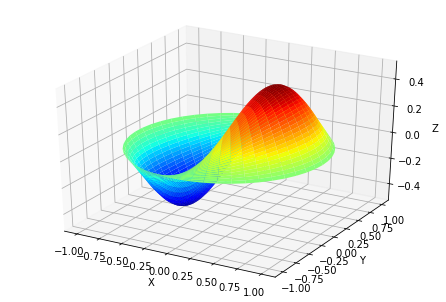

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [13]:
import scipy.special as sc

def step(x):
    return 0.5*(np.sign(x)+ np.sign(1-x))

In [14]:
help()


Welcome to Python 3.7's help utility!

If this is your first time using Python, you should definitely check out
the tutorial on the Internet at https://docs.python.org/3.7/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To quit this help utility and
return to the interpreter, just type "quit".

To get a list of available modules, keywords, symbols, or topics, type
"modules", "keywords", "symbols", or "topics".  Each module also comes
with a one-line summary of what it does; to list the modules whose name
or summary contain a given string such as "spam", type "modules spam".

help> quit

You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Executing "help('string')"
has the same effect as typing a particular string at the help> prompt.


In [15]:
import scipy.integrate as integrate

In [16]:
result = integrate.quad(lambda x: special.jv(2.5,x),0,4.5)
result

(1.1178179380783244, 7.866317216380707e-09)

In [17]:
from numpy import sqrt, sin, cos, pi
I = sqrt(2/pi)*(18.0/27*sqrt(2)*cos(4.5)-4.0/27*sqrt(2)*sin(4.5)+sqrt(2*pi)
               *special.fresnel(3/sqrt(pi))[0])
I

1.117817938088701

In [18]:
def f(x):
    return x+1
integrate.quad(f,0,1)    

(1.5, 1.6653345369377348e-14)

In [19]:
def integrand(x,a,b):
    return a*x**2+b

a=2
b=1
I = integrate.quad(integrand,0,1,args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

In [20]:
def integrand(t,n,x):
    return np.exp(-x*t)/t**n
def expint(n,x):
    return integrate.quad(integrand, 1, np.inf, args=(n,x))[0]
vec_expint = np.vectorize(expint)
vec_expint(3,np.arange(1.0,4.0,0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

In [21]:
##same as above: exponential integral(n,x)
sc.expn(3, np.arange(1.0,4.0,0.5)) 

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

In [22]:
##double integral int_0,inf_1 exp(-x*t)/t**n dtdx = 1/n

result = integrate.quad(lambda x: expint(3,x),0,np.inf)
result

(0.3333333333366853, 1.3274031145043084e-09)

In [23]:
##check if it is the same as 1/n
I3 = 1.0/3.0
I3

0.3333333333333333

In [24]:
##double integral
from scipy.integrate import quad, dblquad

def I(n):
    return dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, 1, np.inf)

In [25]:
print(I(4))
print(I(3))
print(I(2))

(0.2500000000043577, 1.29830334693681e-08)
(0.3333333333366853, 1.3888461883425516e-08)
(0.499999999909358, 1.4640839512484866e-08)


In [26]:
area = dblquad(lambda x,y: x*y, 0,1/2,lambda x: 0, lambda x: 1-2*x) ##bounds from left to right
area

(0.010416666666666668, 4.101620128472366e-16)

In [27]:
##n integral
N = 5
def f(t,x):
    return np.exp(-x*t)/t**N
integrate.nquad(f, [[1,np.inf],[0, np.inf]]) ##inside first

(0.2000000000189363, 1.3682975855986121e-08)

In [28]:
def f(x,y):
    return x*y
def bounds_y():
    return [0,0.5]
def bounds_x(y):
    return [0,1-2*y]
integrate.nquad(f,[bounds_x, bounds_y])

(0.010416666666666668, 4.101620128472366e-16)

In [29]:
## optimization in different algorism
from scipy.optimize import minimize

In [30]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [31]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res= minimize(rosen, x0, method="nelder-mead", options={"xatol":1e-8, "disp":True})

res_p = minimize(rosen, x0, method="powell")


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [32]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2)-400*(xm_p1-xm**2)*xm-2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2)-2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der


In [33]:
res = minimize(rosen, x0, method="BFGS", jac=rosen_der, options={"disp":True})
# res = minimize(rosen, x0, method="BFGS", options={"disp":True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


array([1.00000004, 1.0000001 , 1.00000021, 1.00000044, 1.00000092])

In [39]:
def eggholder(x):
    return (-(x[1]+47)*np.sin(np.sqrt(abs(x[0]/2+(x[1]+47))))
           -x[0]*np.sin(np.sqrt(abs(x[0]-(x[1]+47)))))
bounds = [(-512, 512),(-512,512)]
# eggholder(xy)
xy.shape

(2, 1025, 1025)

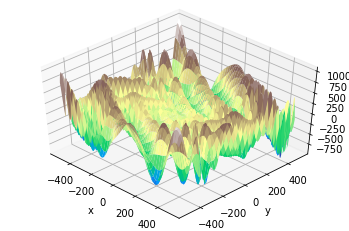

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512,513)
y = np.arange(-512,513)
xgrid, ygrid = np.meshgrid(x,y)
xy = np.stack([xgrid,ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap="terrain")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("eggholder(x,y)")
plt.show()

In [164]:
##Global Minimize within the bound

from scipy import optimize
results =dict()
results["shgo"] = optimize.shgo(eggholder, bounds)
results["shgo"]
results["DA"] = optimize.dual_annealing(eggholder, bounds)
results["DA"]
results["DE"] = optimize.differential_evolution(eggholder, bounds)
results["BH"] = optimize.basinhopping(eggholder, bounds)

##shgo can return all local minima as well
results["shgo_sobol"] = optimize.shgo(eggholder, bounds, n=200, iters=5, sampling_method="sobol")

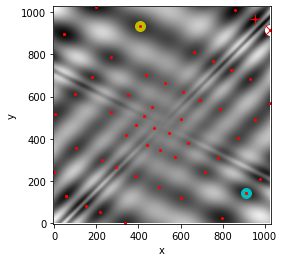

In [176]:
##plot which methods are better than others 
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy),interpolation="bilinear", origin="lower"
              , cmap="gray")
ax.set_xlabel("x")
ax.set_ylabel("y")

def plot_point(res, marker="o", color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)
    
plot_point(results["BH"], color="y") ##basinhopping -yellow
plot_point(results["DE"], color="c") ##differential_evolution -cyan
plot_point(results["DA"], color="w") #dual_annealing -white

# SHGO produces multiple minima, plot them all(with a smaller marker size)
plot_point(results["shgo"], color="r", marker="+")
plot_point(results["shgo_sobol"], color="r", marker="x")
for i in range(results["shgo_sobol"].xl.shape[0]):
    ax.plot(512+results["shgo_sobol"].xl[i,0], 512+results["shgo_sobol"].xl[i,1],
           "ro", ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])

plt.show()

In [177]:
##least square

from scipy.optimize import least_squares

In [200]:
## x is a vector of parameters
## The data is (u,y)
def model(x,u):
    return x[0]*(u**2 + x[1]*u)/(u**2 +x[2]*u+x[3])
def loss(x,u,y):
    return model(x,u)-y

In [205]:
def jac(x,u,y):
    J = np.empty((u.size, x.size))
    den = u**2 + x[2]*u+x[3]
    num = u**2+ x[1] * u
    J[:,0] = num/den
    J[:,1] = x[0]*u/den
    J[:,2] = -x[0]*num*u/den**2
    J[:,3] = -x[0]*num/den**2
    return J

In [206]:
u = np.array([4.0,2.0,1.0 ,5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
             8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.975e-1, 1.974e-1,1.735e-1,1.6e-1,8.44e-2, 6.27e-2, 
             4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2 ])
##starting point
x0 = np.array([2.5,3.9, 4.15, 3.9])
res = least_squares(loss, x0, jac=jac, bounds=(0,100), args=(u,y), verbose=1)

`ftol` termination condition is satisfied.
Function evaluations 133, initial cost 4.4304e+00, final cost 1.6206e-04, first-order optimality 5.81e-08.


In [207]:
res.x

array([0.19591836, 0.18669165, 0.13537644, 0.13459473])

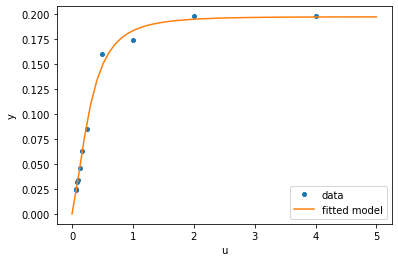

In [208]:
u_test = np.linspace(0,5)
y_test = model(res.x,u_test)
plt.plot(u,y, "o", markersize=4, label="data")
plt.plot(u_test,y_test, label="fitted model")
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()